In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance
import clean as c
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import clean as c
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
df = c.df_b
df1 = c.df1
df2 = c.df2
feats = c.feats
feat_cat = c.encode_n

# Binary Measure 1

In [16]:
X = df1[feats]
y = df1['Out_b']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"training accuracy={rf_clf.score(X_train, y_train)}\ntesting accraucy={rf_clf.score(X_test, y_test)}\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.500
training accuracy=0.9885931558935361
testing accraucy=0.5

              precision    recall  f1-score   support

           0       0.48      0.31      0.38        32
           1       0.51      0.68      0.58        34

    accuracy                           0.50        66
   macro avg       0.49      0.49      0.48        66
weighted avg       0.49      0.50      0.48        66



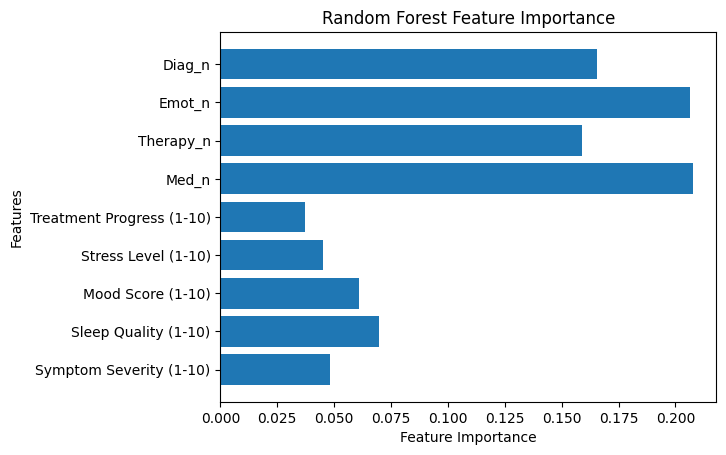

In [4]:
feature_importances = rf_clf.feature_importances_  # Use rf_reg.feature_importances_ for regression
features = X.columns  # Replace with your feature names if X is a NumPy array

# Plot
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

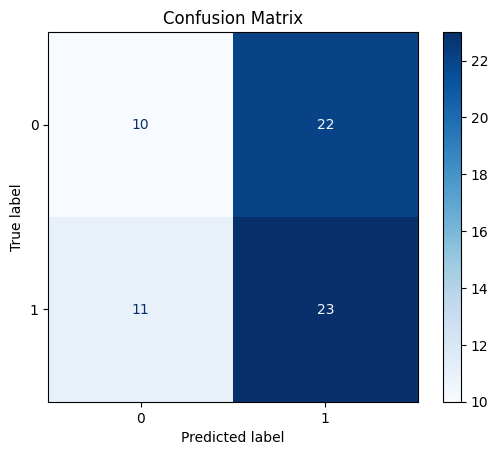

In [5]:


# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=rf_clf.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [6]:
# Initialize the Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Make predictions
y_pred = rf_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R-squared: {r2:.3f}")

Mean Squared Error: 0.299
R-squared: -0.197


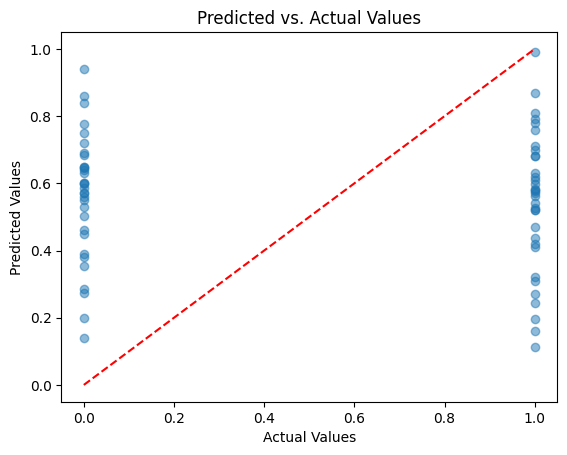

In [7]:
# Predicted vs. Actual values
y_pred = rf_reg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()

Random Forest is only good for categorical values.

# Binary Measure 2

In [17]:
X = df2[feats]
y = df2['Out_b']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"training accuracy={rf_clf.score(X_train, y_train)}\ntesting accraucy={rf_clf.score(X_test, y_test)}\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.576
training accuracy=1.0
testing accraucy=0.5757575757575758

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        39
           1       0.49      0.63      0.55        27

    accuracy                           0.58        66
   macro avg       0.58      0.58      0.57        66
weighted avg       0.60      0.58      0.58        66



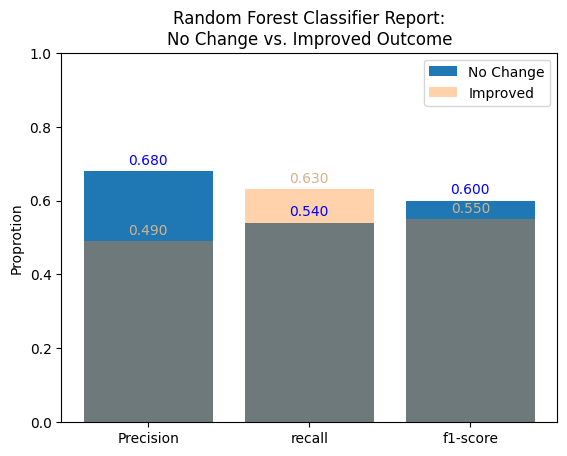

In [39]:
label = ['Precision', 'recall', 'f1-score']
v0 = [0.68   ,   0.54  ,    0.60]
v1 = [0.49   ,   0.63   ,   0.55]

plt.bar(label, v0, label='No Change')
plt.bar(label, v1, alpha=0.35, label= 'Improved')

plt.title("Random Forest Classifier Report:\nNo Change vs. Improved Outcome")
plt.ylabel("Proprotion")
plt.ylim(0.0, 1.0)
plt.legend()
for i, value in enumerate(v0):
    plt.text(i, value + 0.01, f"{value:.3f}", ha='center', va='bottom', color="blue")
    
for i, value in enumerate(v1):
    if i == 1:
        plt.text(i, value + 0.01, f"{value:.3f}", ha='center', va='bottom', color="tan")  
    else:
        plt.text(i, value + 0.01, f"{value:.3f}", ha='center', va='bottom', color="tan")    
plt.show()

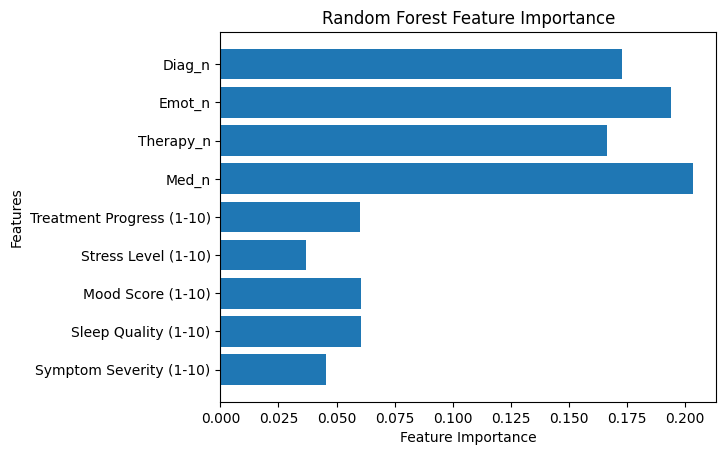

In [9]:
feature_importances = rf_clf.feature_importances_  # Use rf_reg.feature_importances_ for regression
features = X.columns  # Replace with your feature names if X is a NumPy array

# Plot
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

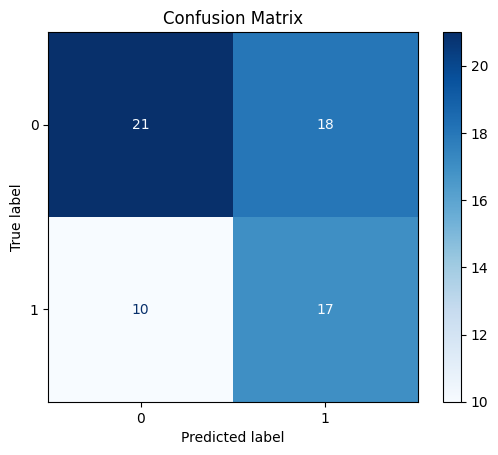

In [10]:


# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test, display_labels=rf_clf.classes_, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


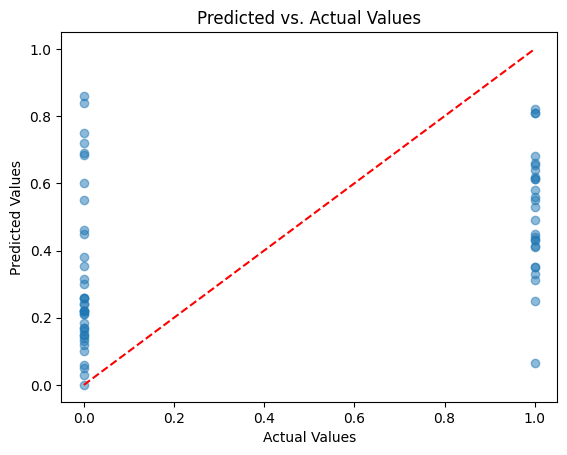

In [11]:
# Predicted vs. Actual values
y_pred = rf_reg.predict(X_test)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()